発見されたCSV数: 16

📂 20251003142418-TorIP_geocoded.csv
  総点数: 1135 / 正常:960 / 異常:175
  スコア: 正常 平均=0.1061  異常 平均=-0.1122
  スコア範囲: min=-0.2540 max=0.1571


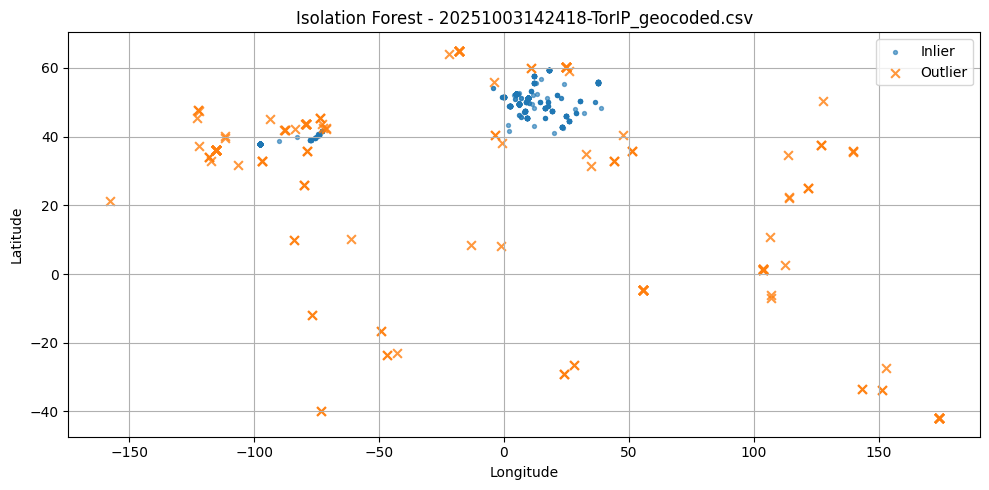


📂 20251003143810-TorIP_geocoded.csv
  総点数: 1134 / 正常:949 / 異常:185
  スコア: 正常 平均=0.1094  異常 平均=-0.1039
  スコア範囲: min=-0.2588 max=0.1592


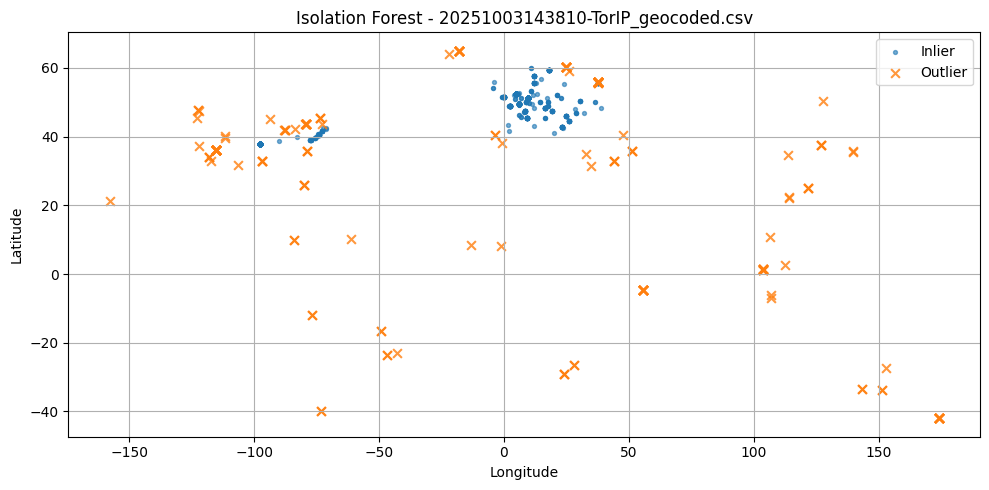


📂 20251003164852-TorIP_geocoded.csv
  総点数: 1132 / 正常:945 / 異常:187
  スコア: 正常 平均=0.1098  異常 平均=-0.1019
  スコア範囲: min=-0.2607 max=0.1587


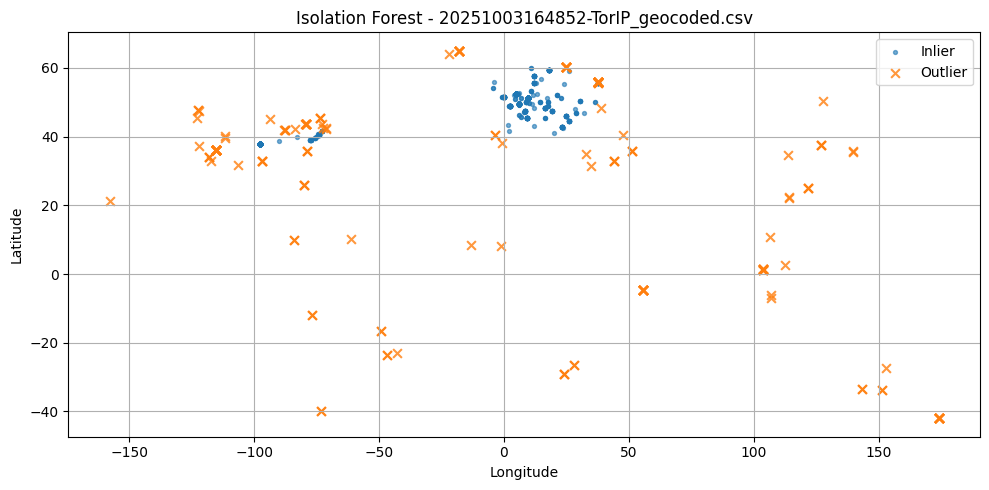


📂 20251003172946-TorIP_geocoded.csv
  総点数: 1132 / 正常:945 / 異常:187
  スコア: 正常 平均=0.1098  異常 平均=-0.1019
  スコア範囲: min=-0.2607 max=0.1587


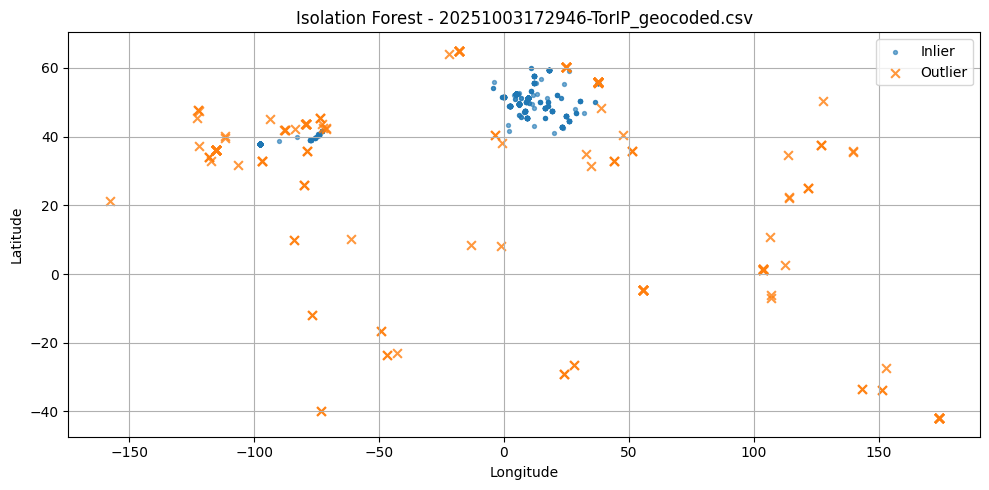


📂 20251003173524-TorIP_geocoded.csv
  総点数: 1132 / 正常:945 / 異常:187
  スコア: 正常 平均=0.1098  異常 平均=-0.1019
  スコア範囲: min=-0.2607 max=0.1587


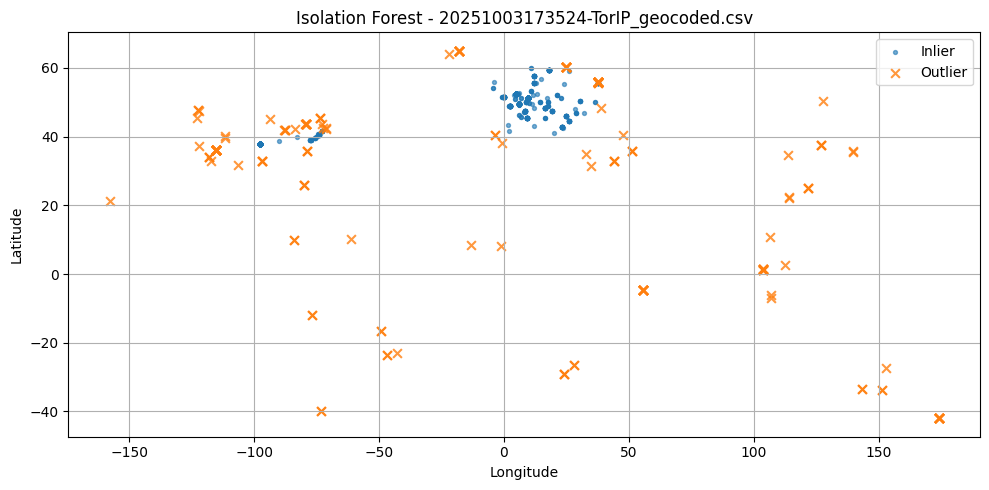


📂 20251004173514-TorIP_geocoded.csv
  総点数: 1138 / 正常:934 / 異常:204
  スコア: 正常 平均=0.1116  異常 平均=-0.0948
  スコア範囲: min=-0.2537 max=0.1590


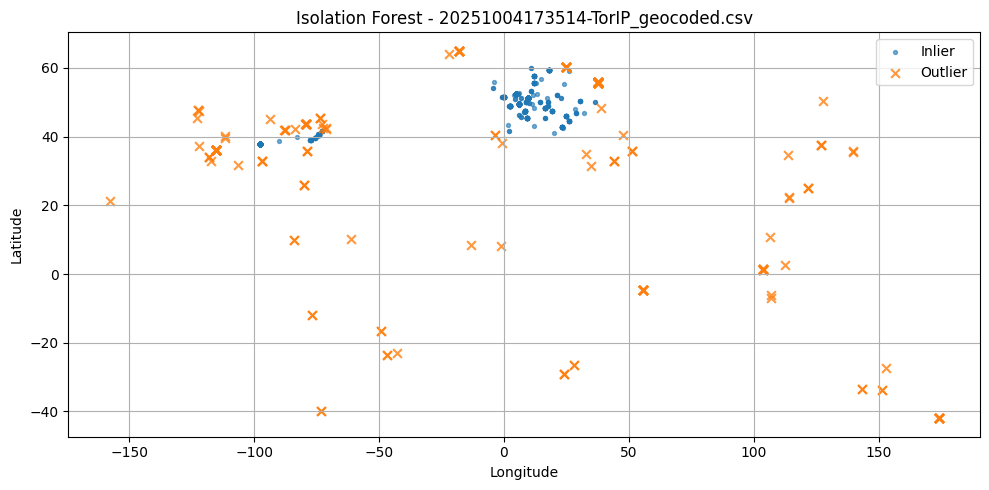


📂 20251005173523-TorIP_geocoded.csv
  総点数: 1128 / 正常:922 / 異常:206
  スコア: 正常 平均=0.1085  異常 平均=-0.0934
  スコア範囲: min=-0.2542 max=0.1568


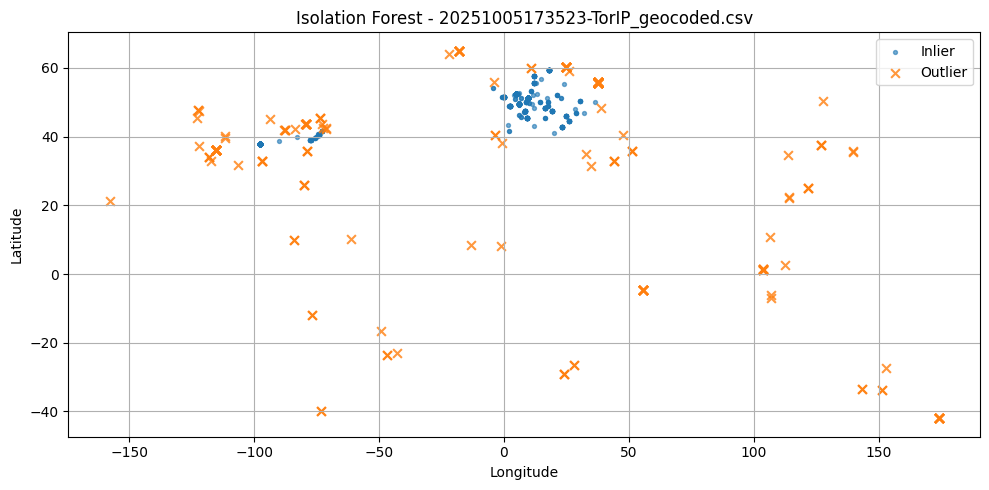


📂 20251006173520-TorIP_geocoded.csv
  総点数: 1129 / 正常:923 / 異常:206
  スコア: 正常 平均=0.1085  異常 平均=-0.0936
  スコア範囲: min=-0.2501 max=0.1582


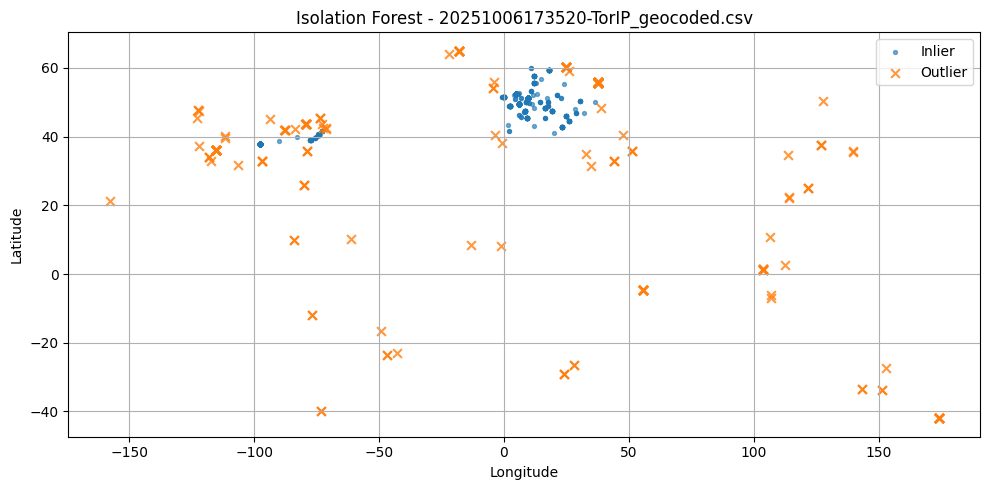


📂 20251007173522-TorIP_geocoded.csv
  総点数: 1135 / 正常:923 / 異常:212
  スコア: 正常 平均=0.1068  異常 平均=-0.0936
  スコア範囲: min=-0.2471 max=0.1545


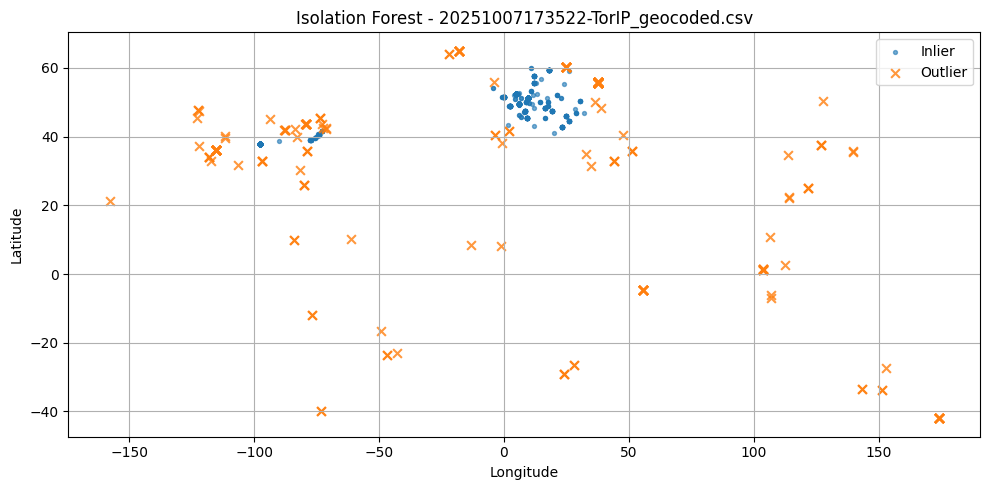


📂 20251008173518-TorIP_geocoded.csv
  総点数: 1134 / 正常:920 / 異常:214
  スコア: 正常 平均=0.1125  異常 平均=-0.0893
  スコア範囲: min=-0.2514 max=0.1598


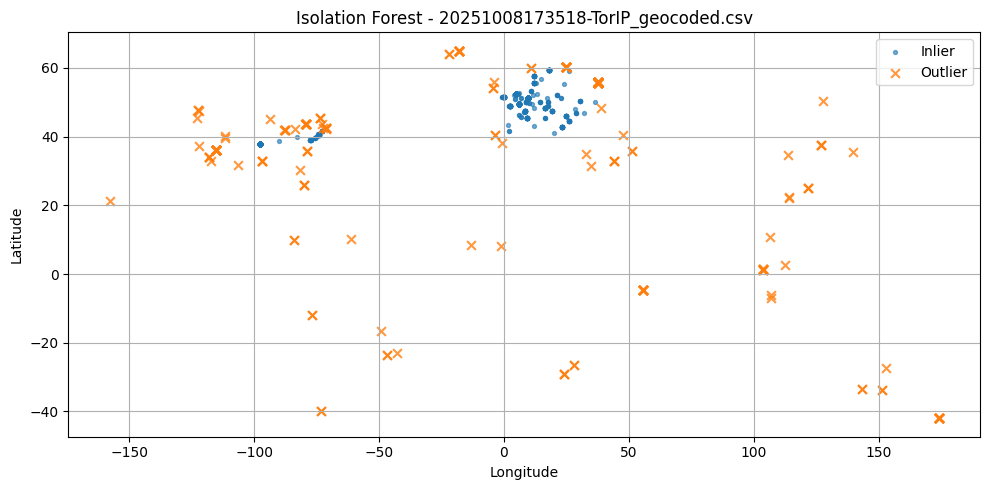


📂 20251009173527-TorIP_geocoded.csv
  総点数: 1135 / 正常:939 / 異常:196
  スコア: 正常 平均=0.1103  異常 平均=-0.0969
  スコア範囲: min=-0.2484 max=0.1585


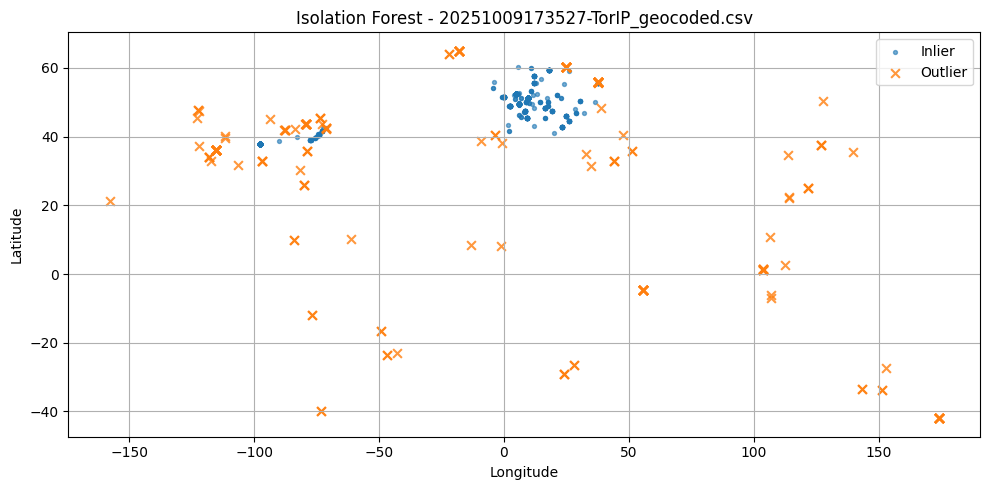


📂 20251010173526-TorIP_geocoded.csv
  総点数: 1147 / 正常:936 / 異常:211
  スコア: 正常 平均=0.1098  異常 平均=-0.0923
  スコア範囲: min=-0.2540 max=0.1586


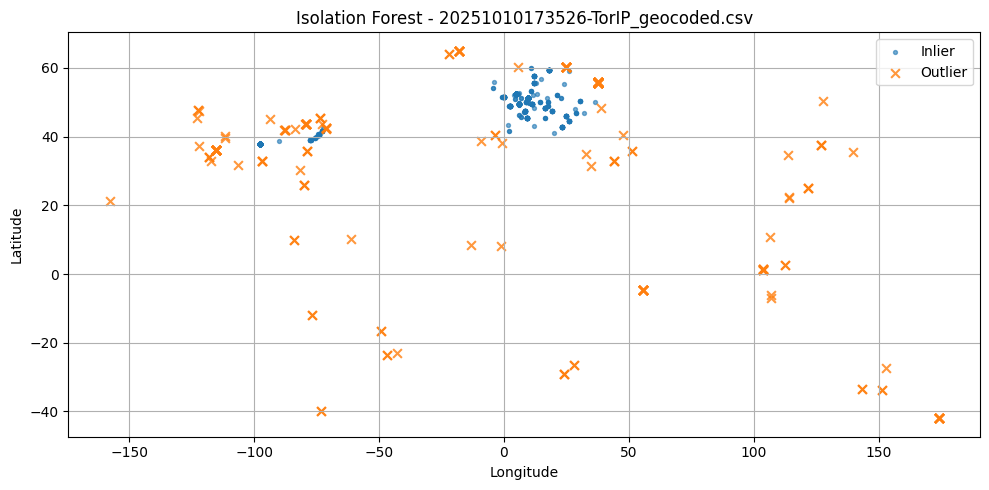


📂 20251011173523-TorIP_geocoded.csv
  総点数: 1146 / 正常:950 / 異常:196
  スコア: 正常 平均=0.1059  異常 平均=-0.0984
  スコア範囲: min=-0.2529 max=0.1549


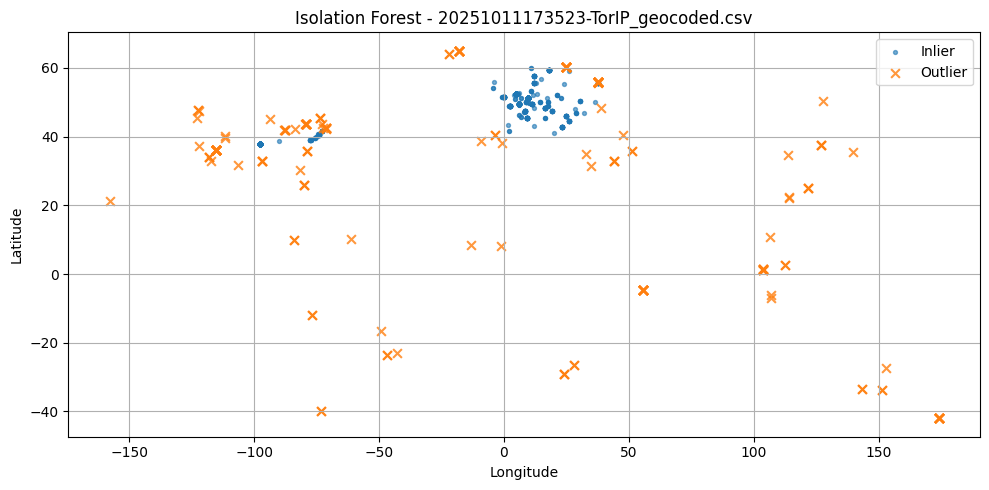


📂 20251012173526-TorIP_geocoded.csv
  総点数: 1149 / 正常:935 / 異常:214
  スコア: 正常 平均=0.1087  異常 平均=-0.0940
  スコア範囲: min=-0.2418 max=0.1570


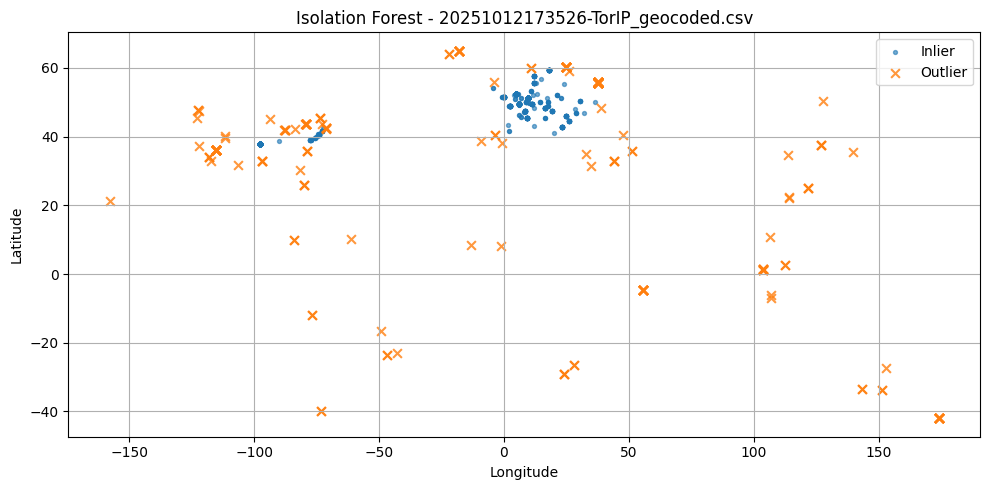


📂 20251013173525-TorIP_geocoded.csv
  総点数: 1151 / 正常:971 / 異常:180
  スコア: 正常 平均=0.1101  異常 平均=-0.1057
  スコア範囲: min=-0.2583 max=0.1592


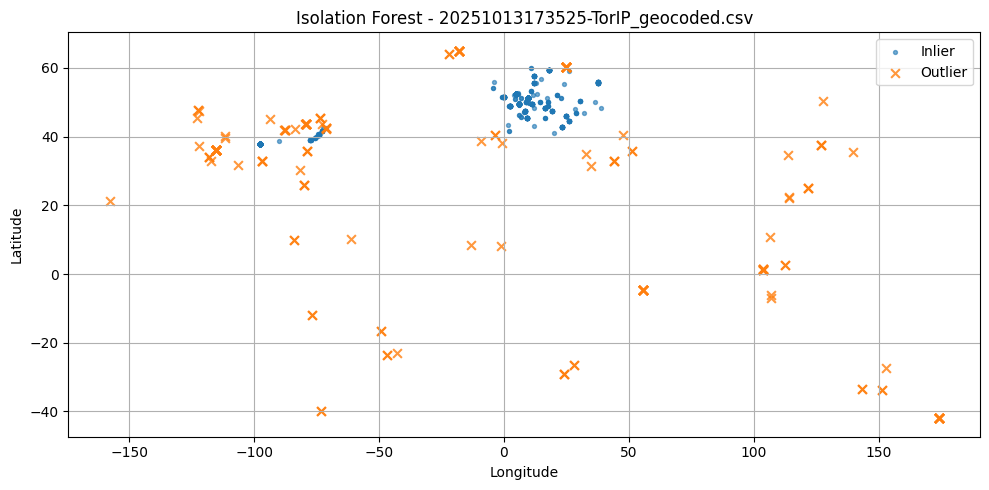


📂 20251014173524-TorIP_geocoded.csv
  総点数: 1149 / 正常:941 / 異常:208
  スコア: 正常 平均=0.1092  異常 平均=-0.0939
  スコア範囲: min=-0.2517 max=0.1572


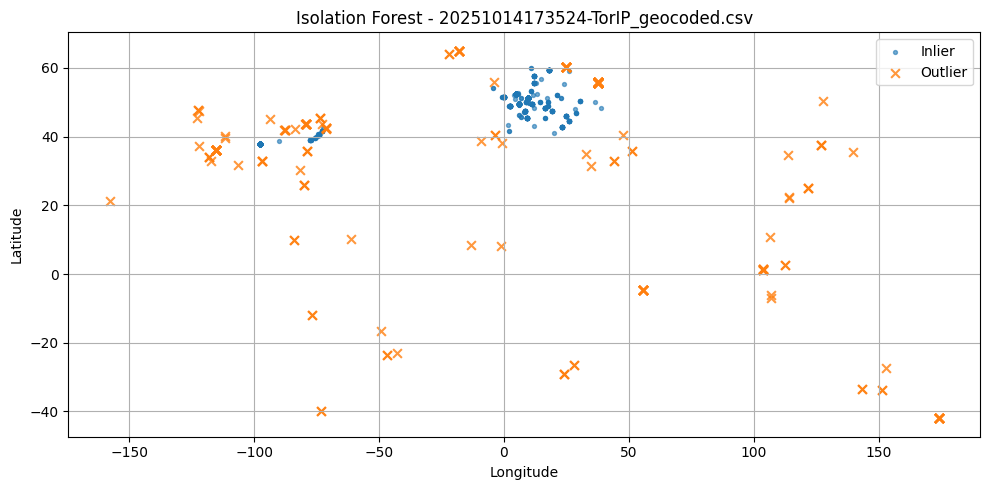

In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import numpy as np

# ====== 設定 ======
ZIP_PATH = "./isolation_forest.zip"
EXTRACT_DIR = "./isolation_forest_all"

# ====== ZIP展開 ======
os.makedirs(EXTRACT_DIR, exist_ok=True)
with zipfile.ZipFile(ZIP_PATH, "r") as z:
    z.extractall(EXTRACT_DIR)

# ====== CSV一覧 ======
csv_files = []
for root, dirs, files in os.walk(EXTRACT_DIR):
    for f in files:
        if f.lower().endswith(".csv"):
            csv_files.append(os.path.join(root, f))
csv_files.sort()

print(f"発見されたCSV数: {len(csv_files)}")

# ====== 緯度経度検出関数 ======
def detect_lat_lon_columns(columns):
    lat_col = next((c for c in columns if "lat" in c.lower()), None)
    lon_col = next((c for c in columns if ("lon" in c.lower()) or ("lng" in c.lower())), None)
    return lat_col, lon_col

# ====== 各ファイル処理 ======
for path in csv_files:
    df = pd.read_csv(path)
    lat_col, lon_col = detect_lat_lon_columns(df.columns)
    if not lat_col or not lon_col:
        print(f"[SKIP] {os.path.basename(path)}: 緯度経度列が見つかりません")
        continue

    # 整形
    df[lat_col] = pd.to_numeric(df[lat_col], errors="coerce")
    df[lon_col] = pd.to_numeric(df[lon_col], errors="coerce")
    df = df.dropna(subset=[lat_col, lon_col])
    df = df[(df[lat_col].between(-90, 90)) & (df[lon_col].between(-180, 180))]
    if len(df) < 5:
        continue

    X = df[[lon_col, lat_col]].to_numpy()

    # ====== Isolation Forest ======
    clf = IsolationForest(n_estimators=200, contamination="auto", random_state=42)
    clf.fit(X)
    preds = clf.predict(X)  # 1=inlier, -1=outlier
    scores = clf.decision_function(X)

    inliers = preds == 1
    outliers = preds == -1
    avg_inlier = np.mean(scores[inliers])
    avg_outlier = np.mean(scores[outliers])
    print(f"\n📂 {os.path.basename(path)}")
    print(f"  総点数: {len(X)} / 正常:{inliers.sum()} / 異常:{outliers.sum()}")
    print(f"  スコア: 正常 平均={avg_inlier:.4f}  異常 平均={avg_outlier:.4f}")
    print(f"  スコア範囲: min={scores.min():.4f} max={scores.max():.4f}")

    # ====== プロット ======
    plt.figure(figsize=(10, 5))
    plt.scatter(X[inliers, 0], X[inliers, 1], s=8, alpha=0.6, label="Inlier")
    plt.scatter(X[outliers, 0], X[outliers, 1], s=40, alpha=0.8, marker="x", label="Outlier")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"Isolation Forest - {os.path.basename(path)}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
